# Salary Prediction

Given a dataset which captures gross salary from 2013 to 2014 and includes only those employees who were employed on june 2013. Predict the salary for employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('trainfile.csv')

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


## Data Preprocessing

In [6]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [7]:
salary = df.copy()

In [8]:
salary.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
salary.columns = salary.columns.str.strip()

In [10]:
salary.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [11]:
salary = salary.dropna(subset=['HireDate'])

In [12]:
salary = salary.drop('GrossPay', axis=1)

In [13]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [15]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [16]:
salary['AnnualSalary'] = salary['AnnualSalary'].apply(lambda x: float(str(x)[1:]))

In [17]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [18]:
salary['Day'] = pd.DatetimeIndex(salary['HireDate']).day

In [19]:
salary['Month'] = pd.DatetimeIndex(salary['HireDate']).month

In [20]:
salary['Year'] = pd.DatetimeIndex(salary['HireDate']).year

In [21]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Day,Month,Year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [22]:
salary.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [23]:
salary.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [24]:
salary.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [25]:
salary.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [26]:
salary.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

<AxesSubplot:>

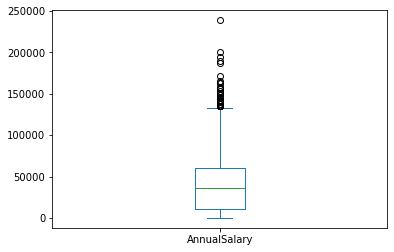

In [27]:
salary.AnnualSalary.plot.box()

In [28]:
salary.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [29]:
salary = salary[salary['AnnualSalary']<140000]

<AxesSubplot:>

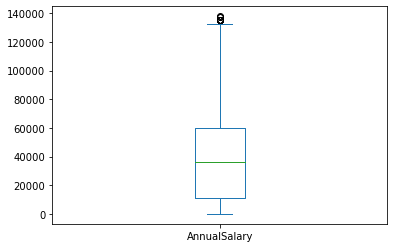

In [30]:
salary.AnnualSalary.plot.box()

## Exploratory Data Analysis

Text(0.5, 1.0, 'Annual Salary Distrbution')

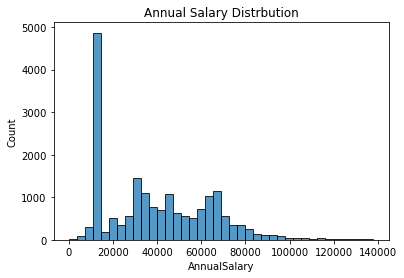

In [31]:
sns.histplot(salary.AnnualSalary)
plt.title('Annual Salary Distrbution')

In [32]:
salary.groupby(['JobTitle']).count()

,Name,AgencyID,Agency,HireDate,AnnualSalary,Day,Month,Year
JobTitle,,,,,,,,
911 LEAD OPERATOR,5,5,5,5,5,5,5,5
911 OPERATOR,78,78,78,78,78,78,78,78
911 OPERATOR SUPERVISOR,4,4,4,4,4,4,4,4
ACCOUNT EXECUTIVE,5,5,5,5,5,5,5,5
ACCOUNTANT I,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...
ZONING ADMINISTRATOR,1,1,1,1,1,1,1,1
ZONING APPEALS ADVISOR BMZA,1,1,1,1,1,1,1,1
ZONING ENFORCEMENT OFFICER,1,1,1,1,1,1,1,1


**Top 10 jobs for being hired?**

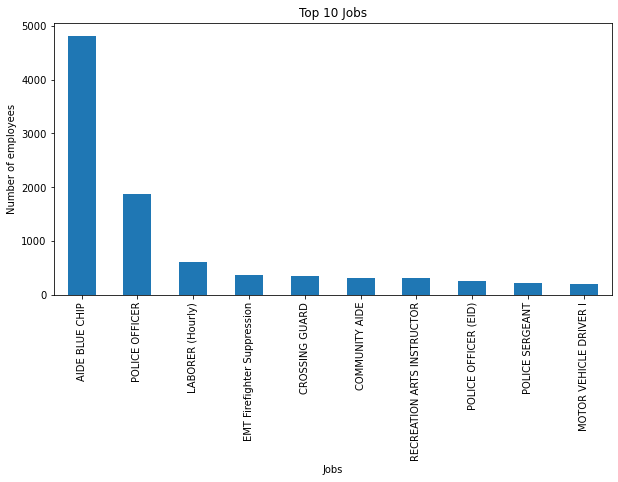

In [33]:
plt.figure(figsize = (10, 5))
salary.JobTitle.value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Jobs')
plt.xlabel('Jobs')
plt.ylabel('Number of employees')
plt.show()

**Top 10 Jobs that fetch highest salary?**

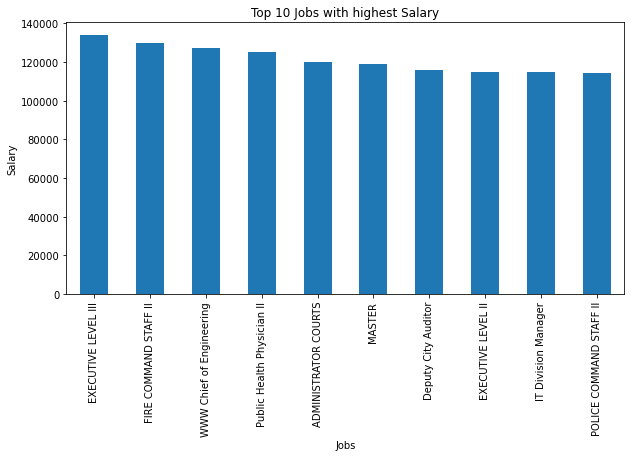

In [34]:
plt.figure(figsize=(10, 5))
salary.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Jobs with highest Salary')
plt.xlabel('Jobs')
plt.ylabel('Salary')
plt.show()

**How many jobs pay higher than the overall average salary?**

In [35]:
mean_sal = salary.AnnualSalary.mean()

In [36]:
x = salary.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()

In [37]:
x[x['AnnualSalary'] > mean_sal]['JobTitle'].count()

805

In [38]:
salary.shape

(18885, 9)

In [39]:
salary['Agency'] = salary['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

**Top 10 agencies that have hired higher number of employees?**

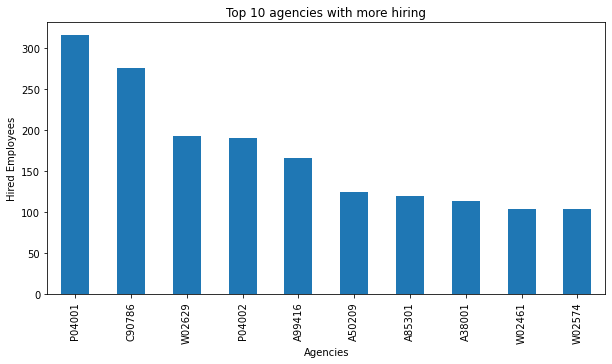

In [40]:
plt.figure(figsize = (10, 5))
salary.AgencyID.value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 agencies with more hiring')
plt.xlabel('Agencies')
plt.ylabel('Hired Employees')
plt.show()

**Which AgencyId has higher number of people working?**

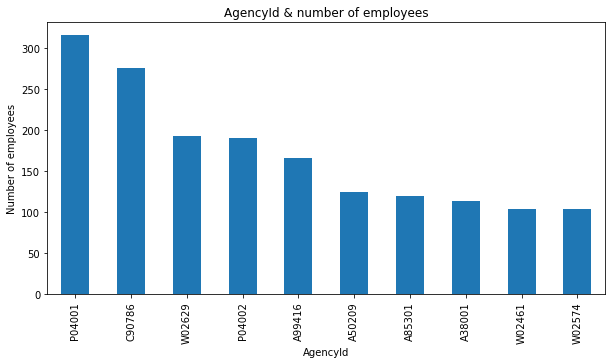

In [41]:
plt.figure(figsize = (10, 5))
salary.AgencyID.value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title('AgencyId & number of employees')
plt.xlabel('AgencyId')
plt.ylabel('Number of employees')
plt.show()

**Pattern between Year & Salary?**

<AxesSubplot:xlabel='Year', ylabel='AnnualSalary'>

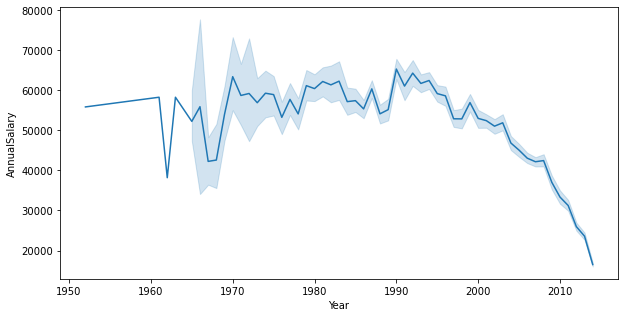

In [42]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = salary['Year'], y = salary['AnnualSalary'])

**Latest Trend in Salary?**

<AxesSubplot:xlabel='Year'>

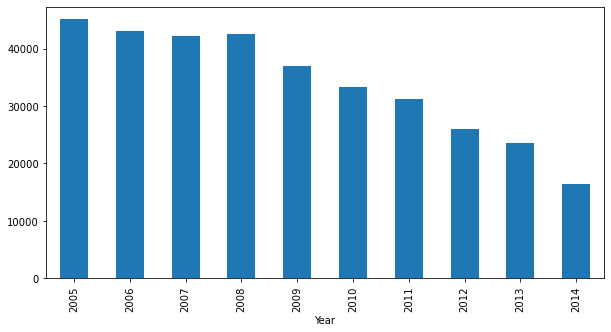

In [43]:
plt.figure(figsize = (10, 5))
salary.groupby(['Year'])['AnnualSalary'].mean().tail(10).plot.bar()

**Months have any impact on Salary?**

<AxesSubplot:xlabel='Month'>

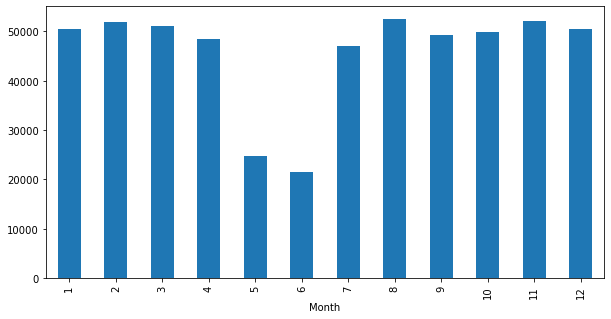

In [44]:
plt.figure(figsize = (10, 5))
salary.groupby(['Month'])['AnnualSalary'].mean().plot.bar()

**Months with more hiring?**

<AxesSubplot:>

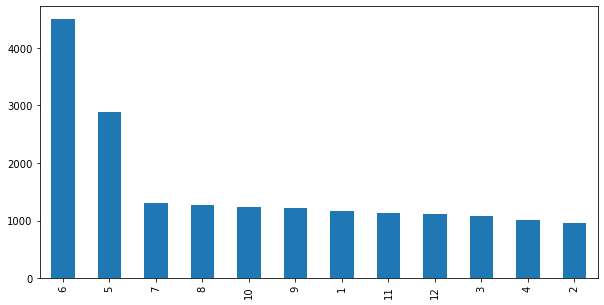

In [45]:
plt.figure(figsize = (10, 5))
salary.Month.value_counts().plot.bar()

### Multivariate Analysis

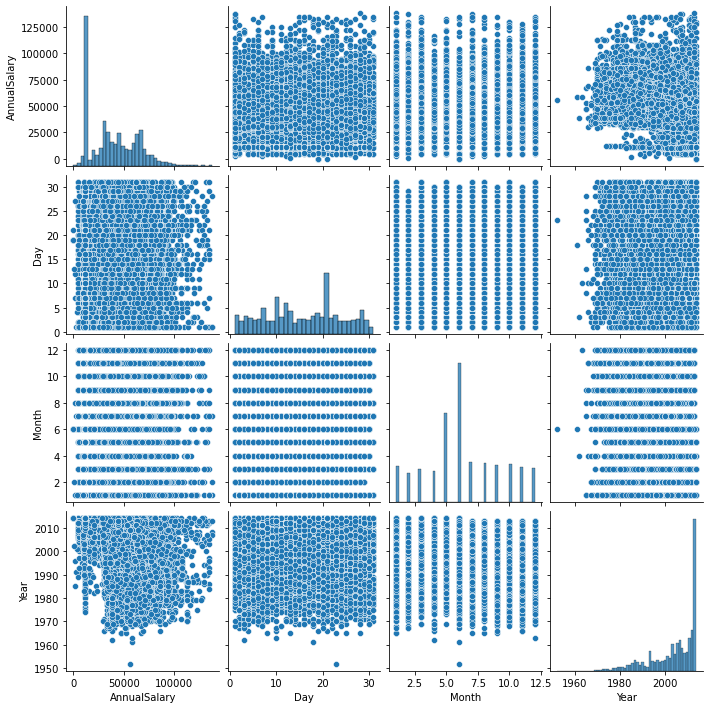

In [46]:
sns.pairplot(salary)

<AxesSubplot:>

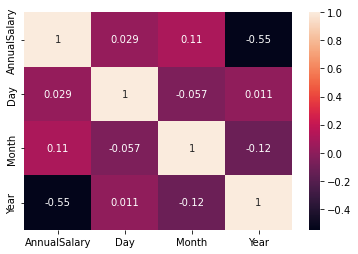

In [47]:
sns.heatmap(salary.corr(), annot=True)

# Feature Engineering

**Average annual salary of a job**

In [48]:
mean_sal = salary.groupby('JobTitle')['AnnualSalary'].mean()

In [49]:
mean_sal

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [50]:
salary['Mean Salary'] = salary.JobTitle.map(mean_sal)

In [51]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Day,Month,Year,Mean Salary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013,11313.967200
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979,47443.500000
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006,69750.666667
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009,57940.000000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013,44531.160494


**Average annual salary of an AgencyID**

In [52]:
mean_agency_id = salary.groupby('AgencyID')['AnnualSalary'].mean()

In [53]:
mean_agency_id

AgencyID
A01001    58253.577662
A01020    80547.000000
A01030    77855.222222
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1176, dtype: float64

In [54]:
salary['Mean AgencyID'] = salary.AgencyID.map(mean_agency_id)

In [55]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Day,Month,Year,Mean Salary,Mean AgencyID
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013,11313.967200,11310.000000
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979,47443.500000,46667.000000
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006,69750.666667,65926.133333
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009,57940.000000,48071.851064
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013,44531.160494,44012.307229


**Average annual salary of an Agency**

In [56]:
mean_agency = salary.groupby('Agency')['AnnualSalary'].mean()

In [57]:
mean_agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      67637.625000
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Highways (wkly)     31335.585185
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11313.967200
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 64, dtype: float64

In [58]:
salary['Mean Agency'] = salary.Agency.map(mean_agency)

In [59]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Day,Month,Year,Mean Salary,Mean AgencyID,Mean Agency
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013,11313.967200,11310.000000,11313.967200
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979,47443.500000,46667.000000,51495.424242
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006,69750.666667,65926.133333,64874.560224
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009,57940.000000,48071.851064,39980.900360
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013,44531.160494,44012.307229,61481.005417


In [60]:
salary.drop(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate'], axis=1, inplace=True)

In [61]:
salary.head()

,AnnualSalary,Day,Month,Year,Mean Salary,Mean AgencyID,Mean Agency
0,11310.0,10,6,2013,11313.967200,11310.000000,11313.967200
1,53428.0,24,10,1979,47443.500000,46667.000000,51495.424242
2,68300.0,25,9,2006,69750.666667,65926.133333,64874.560224
3,62000.0,23,7,2009,57940.000000,48071.851064,39980.900360
4,43999.0,24,7,2013,44531.160494,44012.307229,61481.005417


# Modeling

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
features = salary.drop('AnnualSalary', axis=1)
target = salary['AnnualSalary']

## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaled = scaler.fit_transform(features)

# scaler.fit(features)
# scaler.transform(features)

In [67]:
scaled_features = pd.DataFrame(scaled, columns=salary.columns[1:])
scaled_features.head()

,Day,Month,Year,Mean Salary,Mean AgencyID,Mean Agency
0,-0.687804,-0.125420,0.858322,-1.162212,-1.270577,-1.345402
1,0.981832,1.231146,-2.413642,0.327909,0.323426,0.573053
2,1.101092,0.892004,0.184682,1.247944,1.191688,1.211838
3,0.862573,0.213721,0.473385,0.760826,0.386761,0.023295
4,0.981832,0.213721,0.858322,0.207793,0.203745,1.049813


## Train Test Split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, target, test_size = 0.3, random_state = 101)

In [69]:
X_train.head()

,Day,Month,Year,Mean Salary,Mean AgencyID,Mean Agency
17088,-0.568544,-0.125420,0.473385,-1.162212,-1.270577,-1.345402
2218,0.504794,-0.803703,-1.643768,1.381150,1.803911,1.498560
11970,0.624053,-0.464562,0.954556,-1.162212,-1.270577,-1.345402
2627,1.101092,-0.803703,0.280916,1.254103,0.164449,0.219622
11559,0.624053,-1.142845,0.665853,0.316637,1.450385,1.548883


In [70]:
Y_train.head()

17181    11310.0
2292     75197.0
12054    11310.0
2701     69900.0
11642    46583.0
Name: AnnualSalary, dtype: float64

## Creating the Model

### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [72]:
linear = LinearRegression()

In [73]:
linear.fit(X_train, Y_train)

LinearRegression()

In [74]:
predictions = linear.predict(X_test)

In [75]:
print(r2_score(Y_test, predictions))

0.9697541301622247


**r2_score():**
_It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model._

In [76]:
linear.coef_

array([  -42.6299744 ,   -66.05125459, -2167.53007651, 22052.76513627,
        2827.00569015, -1684.11573621])

In [77]:
linear.intercept_

39480.50269863694